# Datos anteriores

In [4]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

url_clientes = "https://gist.githubusercontent.com/ahcamachod/d08898e1cc84c7271856e78d9558ca3d/raw/2f7e1fa53711efe6433a5c5ec79948f600591cb9/clientes_zoop.csv"
url_ventas = "https://gist.githubusercontent.com/ahcamachod/966d7162a3c3a2769b8770b35abf1bcc/raw/d79941b3fa46a450f3611589abd8663399c1277b/ventas_zoop.csv"
url_zoop_pay = "https://gist.githubusercontent.com/ahcamachod/ce728231a836a973c0df94a9f03ed871/raw/8db6da43d7cd94fcab937208067d0fceb521b78c/zoop_pay.csv"

clientes = pd.read_csv(url_clientes)
ventas = pd.read_csv(url_ventas)
ventas["fecha"] = pd.to_datetime(ventas["fecha"], format="%Y-%m-%d")
ventas["horario"] = pd.to_datetime(ventas["horario"], format="%H:%M").dt.time

df = pd.merge(ventas, clientes, on="ID_compra", how="inner")
# Reorganizar las columnas en el orden deseado
columnas_ordenadas = [
    "ID_compra",
    "fecha",
    "horario",
    "categoria",
    "precio_unitario",
    "cantidad",
    "envio",
    "metodo_pago",
    "ID_cliente",
    "edad",
    "sexo_biologico",
    "ciudad",
    "estado",
    "region",
    "cashback",
    "nota",
]

# Aplicar el orden de las columnas
df = df[columnas_ordenadas]

clientes = pd.read_csv(url_clientes)
ventas = pd.read_csv(url_ventas)
zoop_pay = pd.read_csv(url_zoop_pay)

# 2. Unir ventas y clientes por 'ID_compra'
df = pd.merge(ventas, clientes, on="ID_compra", how="inner")

# 3. Unir con la base zoop_pay por 'ID_cliente'
df = pd.merge(df, zoop_pay, on="ID_cliente", how="left")

# 4. Renombrar columnas para estandarizar nombres
df = df.rename(
    columns={
        "fecha de la compra": "fecha",
        "hora de la compra": "horario",
        "categoría del producto": "categoria",
        "precio unitario del producto": "precio_unitario",
        "cantidad vendida": "cantidad",
        "método de pago": "metodo_pago",
        "sexo biológico": "sexo_biologico",
        "programa de cashback": "cashback",
    }
)

# 5. Asegurar tipo datetime para la columna 'fecha'
df["fecha"] = pd.to_datetime(df["fecha"], errors="coerce")

# 6. Reordenar las columnas en el orden solicitado
columnas_ordenadas = [
    "ID_compra",
    "fecha",
    "horario",
    "categoria",
    "precio_unitario",
    "cantidad",
    "envio",
    "metodo_pago",
    "ID_cliente",
    "edad",
    "sexo_biologico",
    "ciudad",
    "estado",
    "region",
    "cashback",
    "zoop_pay",
]

df = df[columnas_ordenadas]
df.head()

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Crear la tabla resumen
metodos_de_pago = df["metodo_pago"].value_counts().reset_index()
metodos_de_pago.columns = ["metodo_pago", "cantidad"]

# 1. Crear una columna de facturación total por compra
df["facturacion"] = df["precio_unitario"] * df["cantidad"] + df["envio"]

# 2. Agrupar por categoría y sumar la facturación
facturacion_categoria = df.groupby("categoria")["facturacion"].sum().sort_values()

# Asegurarse de que la columna 'fecha' es datetime
df["fecha"] = pd.to_datetime(df["fecha"])

# Crear columna con el mes como texto completo
df["mes_nombre"] = df["fecha"].dt.strftime("%B")  # e.g., 'January', 'February', etc.

# Crear columna con el número del mes para ordenar correctamente
df["mes_numero"] = df["fecha"].dt.month

# Calcular la facturación mensual
ventas_mensuales = (
    df.groupby(["mes_numero", "mes_nombre"])["facturacion"].sum().reset_index()
)

# Ordenar por número de mes
ventas_mensuales = ventas_mensuales.sort_values("mes_numero")

# Diccionario de traducción de meses
meses = {
    "January": "Ene",
    "February": "Feb",
    "March": "Mar",
    "April": "Abr",
    "May": "May",
    "June": "Jun",
    "July": "Jul",
    "August": "Ago",
    "September": "Sep",
    "October": "Oct",
    "November": "Nov",
    "December": "Dic",
}

# Aplicar traducción
ventas_mensuales["mes"] = ventas_mensuales["mes_nombre"].map(meses)

# 2. Crear columna de trimestre (formato 'T1', 'T2', etc.)
df["trimestre"] = df["fecha"].dt.to_period("Q").astype(str).str.replace("2023Q", "T")

# 3. Agrupar por trimestre y método de pago, sumando facturación
ventas_trimestre = (
    df.groupby(["trimestre", "metodo_pago"])["facturacion"].sum().unstack(fill_value=0)
)

# Filtrar solo las 3 categorías deseadas
categorias_interes = ["Papelería y oficina", "Libros", "Alimentos y bebidas"]
df_filtrado = df[df["categoria"].isin(categorias_interes)]

# Agrupar por trimestre y categoría, sumando la facturación
ventas_categoria = (
    df_filtrado.groupby(["trimestre", "categoria"])["facturacion"]
    .sum()
    .unstack(fill_value=0)
)

ventas_region = (
    df.groupby("region", as_index=False)["facturacion"]
    .sum()
    .sort_values(
        "facturacion", ascending=True
    )  # orden ascendente para barras horizontales
)

df_filtrado = df[df["estado"].isin(["Estado de México", "Puebla"])]

# 2. Agrupar por estado y sexo biológico, contar cantidad
publico_estado_sexo = (
    df_filtrado.groupby(["estado", "sexo_biologico"])
    .size()
    .reset_index(name="cantidad")
)

# Desafío

Volviendo a nuestro proyecto de Manos a la Obra, logramos generar dos visualizaciones más con los datos de nuestros desafíos.

¿Ahora, vamos a crear otros visuales enfocados en el perfil de nuestros clientes?

Has recibido una nueva solicitud de Zoop para generar 2 visuales, siendo uno de ellos relacionado al registro de clientes para un nuevo servicio que Zoop implementará, el Zoop Pay, y el otro sobre las evaluaciones de los clientes en relación con su ubicación. Observemos las dos situaciones y construyamos con la ayuda de ChatGPT los dos gráficos solicitados:

**Desafío 1:**

Zoop está en proceso de lanzamiento de su billetera digital, que brindará acceso a una serie de beneficios para sus clientes, y le gustaría saber cuál es el porcentaje de personas que ya están pre-registradas para este producto. El e-commerce busca comprender este número para definir la necesidad de promoción y esfuerzo para atraer más clientes a esta funcionalidad.

Construye y ejecuta un prompt en ChatGPT para generar, a partir de nuestra base de datos, un visual que presente la proporción de personas pre-registradas en Zoop Pay.

**Desafío 2:**

Zoop quiere analizar la distribución de las edades de los clientes por región con el fin de delinear una "persona" (perfil) de su clientela en diferentes localidades del país, y para ello, solicitó un visual que distribuya estos datos. Construye y ejecuta un prompt en ChatGPT para generar, a partir de nuestra base de datos, un visual que muestre la distribución de las edades de los clientes por región.

## Desafío 1:

### Prompt

Se buscará encontrar el porcentaje de clientes que están pre-registrados para el nuevo producto de Zoop, la billetera digital Zoop Pay. La intención es comprender el número para definir la necesidad de promoción y esfuerzo para atraer más clientes hacia la billetera digital.
En el DataFrame llamado `df` contiene una columna llamada `zoop_pay` con dos opciones de valores `Sí` y `No`.

La tarea es:
1. Genera una visualización que grafique la proporción de clientes pre-registrados enb Zoop Pay.
Utiliza las bibliotecas de visualización de datos de Python.

### Respuesta

Para representar la **proporción de clientes pre-registrados en Zoop Pay**, una buena opción es un **gráfico de pastel (pie chart)** o un **gráfico de barras**. Ambos son adecuados para mostrar proporciones categóricas. A continuación, te muestro cómo hacerlo con ambas opciones usando `Plotly`, que ofrece interactividad, pero también te doy el ejemplo con `matplotlib` por si prefieres algo más simple.

---

#### ✅ Opción 1: Gráfico de pastel interactivo (con Plotly)

```python
import plotly.express as px

# Contar los registros por participación en Zoop Pay
zoop_pay_data = df['zoop_pay'].value_counts().reset_index()
zoop_pay_data.columns = ['zoop_pay', 'cantidad']

# Crear gráfico de pastel
fig = px.pie(
    zoop_pay_data, 
    names='zoop_pay', 
    values='cantidad', 
    title='Proporción de clientes pre-registrados en Zoop Pay',
    color='zoop_pay',
    color_discrete_map={'Sí': 'mediumseagreen', 'No': 'indianred'},
    hole=0.4  # opcional: para hacer un donut chart
)
fig.show()
```

---

#### ✅ Opción 2: Gráfico de barras (con Matplotlib y Seaborn)

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Contar los registros
zoop_counts = df['zoop_pay'].value_counts().reset_index()
zoop_counts.columns = ['zoop_pay', 'cantidad']

# Crear gráfico
plt.figure(figsize=(6, 5))
sns.barplot(data=zoop_counts, x='zoop_pay', y='cantidad', palette={'Sí': 'mediumseagreen', 'No': 'indianred'})

# Añadir etiquetas
for i, row in zoop_counts.iterrows():
    plt.text(i, row['cantidad'] + 10, f"{row['cantidad']} ({(row['cantidad']/zoop_counts['cantidad'].sum()*100):.1f}%)", 
             ha='center', va='bottom')

plt.title('Clientes pre-registrados en Zoop Pay')
plt.xlabel('Pre-registro en Zoop Pay')
plt.ylabel('Cantidad de clientes')
plt.tight_layout()
plt.show()
```

---

¿Te gustaría que muestre también cómo cambiar este gráfico para un reporte en Power BI o para formato vertical en dashboards web?


In [9]:
import plotly.express as px

# Contar los registros por participación en Zoop Pay
zoop_pay_data = df["zoop_pay"].value_counts().reset_index()
zoop_pay_data.columns = ["zoop_pay", "cantidad"]

# Crear gráfico de pastel
fig = px.pie(
    zoop_pay_data,
    names="zoop_pay",
    values="cantidad",
    title="Proporción de clientes pre-registrados en Zoop Pay",
    color="zoop_pay",
    color_discrete_map={"Sí": "mediumseagreen", "No": "indianred"},
    hole=0.4,  # opcional: para hacer un donut chart
)
fig.show()

## Desafío 2:

### Prompt

Para el DataFrame llamado `df` se necesita analizar la distribución de las edades de los clientes por región. Esto para delinear una "persona" o perfil de su clientela en diferentes localidades del país. Será necesario crar una visual que distribuya esos datos.
En `df` cuentas con la columna `edad` de tipo numérico y otra columna `region` con distintos nombres de regiones.
Genera un gráfico que muestre la distribución de las edades de los clientes por región. Utiliza las librerías de visualización de datos de Python.

### Respuesta

Para analizar la **distribución de las edades de los clientes por región**, una excelente opción es usar un **boxplot (diagrama de caja)**. Este tipo de gráfico permite comparar la dispersión, la mediana y los valores atípicos entre regiones de forma clara y efectiva.

A continuación te muestro cómo hacerlo utilizando `Seaborn`, una biblioteca poderosa y estética basada en `matplotlib`.

---

#### 📊 Opción: Boxplot con `Seaborn`

```python
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='region', y='edad', palette='Set2')

plt.title('Distribución de edades de los clientes por región')
plt.xlabel('Región')
plt.ylabel('Edad')
plt.xticks(rotation=45)  # Rotar etiquetas si son muchas
plt.tight_layout()
plt.show()
```

---

#### ✅ ¿Por qué un boxplot?

* Muestra la **mediana** (línea central del cuadro)
* Visualiza la **dispersión** (rango intercuartil)
* Permite detectar **outliers** (valores atípicos)
* Ideal para comparar **varias categorías** (en este caso, regiones)

---

Si prefieres una visual más suave y continua, también se podría usar un gráfico de violín (`sns.violinplot`) o incluso `stripplot` para ver los puntos individuales.

¿Quieres también una versión interactiva con `Plotly`?

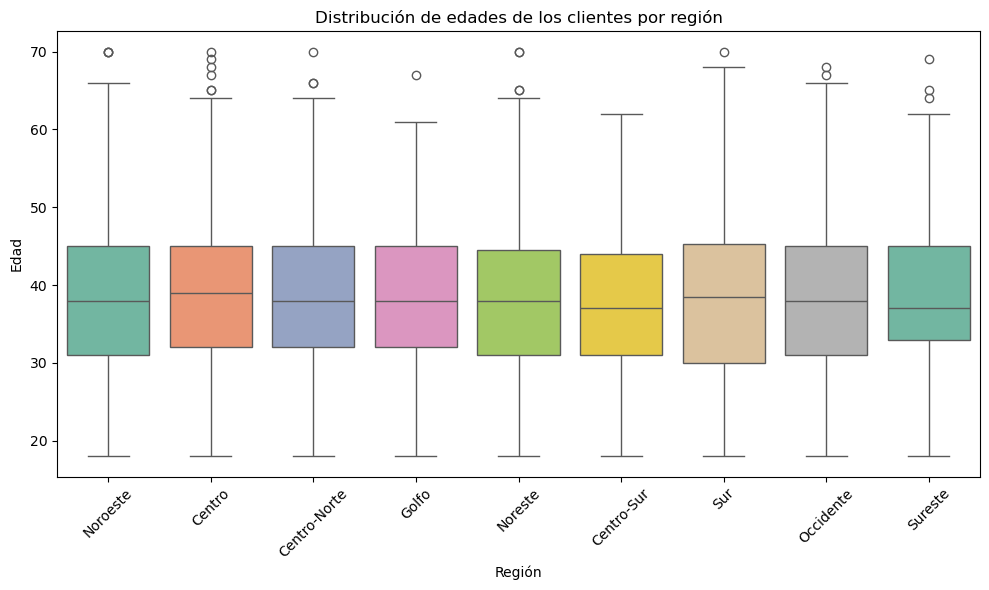

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="region", y="edad", palette="Set2")

plt.title("Distribución de edades de los clientes por región")
plt.xlabel("Región")
plt.ylabel("Edad")
plt.xticks(rotation=45)  # Rotar etiquetas si son muchas
plt.tight_layout()
plt.show()